# TP2 : Exploration de l'année 1954

# Imports

In [21]:
import os
import yake
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_md')
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noemiemuller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Keywords

In [2]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général"])

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

# Enlever les fichiers qui ne commencent pas par Bxl_
bxl_files = [f for f in files if f.startswith('Bxl_')]

# Enlever les fichiers ne contenant pas 1954
bxl_1954_files = [f for f in files if "1954" in f]

for f in sorted(bxl_1954_files)[:10]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1954_Tome_III_Part_1.txt mentions these keywords: Xavier Carton, Van Leynseele, Avis favorable, centimes additionnels, Taxes communales, taxe n'est, d'une taxe, Vanden Boeynants...
Bxl_1954_Tome_III_Part_2.txt mentions these keywords: Pouvoir compétent, Commission d'Assistance, d'Assistance publique, publique sollicite, Loi communale, voie publique, avis favorable, vente publique, Receveur communal, d'une dépense, L'Administration communale...
Bxl_1954_Tome_III_Part_3.txt mentions these keywords: Vanden Boeynants, Van Leynseele, Commission d'Assistance, d'Assistance publique, d'une dépense, Avis favorable, Van den, Ecole normale...
Bxl_1954_Tome_III_Part_4.txt mentions these keywords: Pouvoir compétent, Commission d'Assistance, d'Assistance publique, publique sollicite, d'une dépense, Principe d'une, avis favorable, Budget extraordinaire, Vente publique, compétent l'autorisation, budget ordinaire, Fonds communal, Travaux publics...
Bxl_1954_Tome_III_Part_5.txt mentions these keywor

# 2. Wordclouds

## Nuage de mot 1954

In [3]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw] #??????exclure ICI les X mots les moins fréquents??????
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

[('rue', 2205), ('francs', 1736), ('publique', 1634), ('bruxelles', 1605), ('conseil', 1303), ('bourgmestre', 1284), ('travaux', 1251), ('communal', 1143), ('question', 1079), ('collège', 1050)]


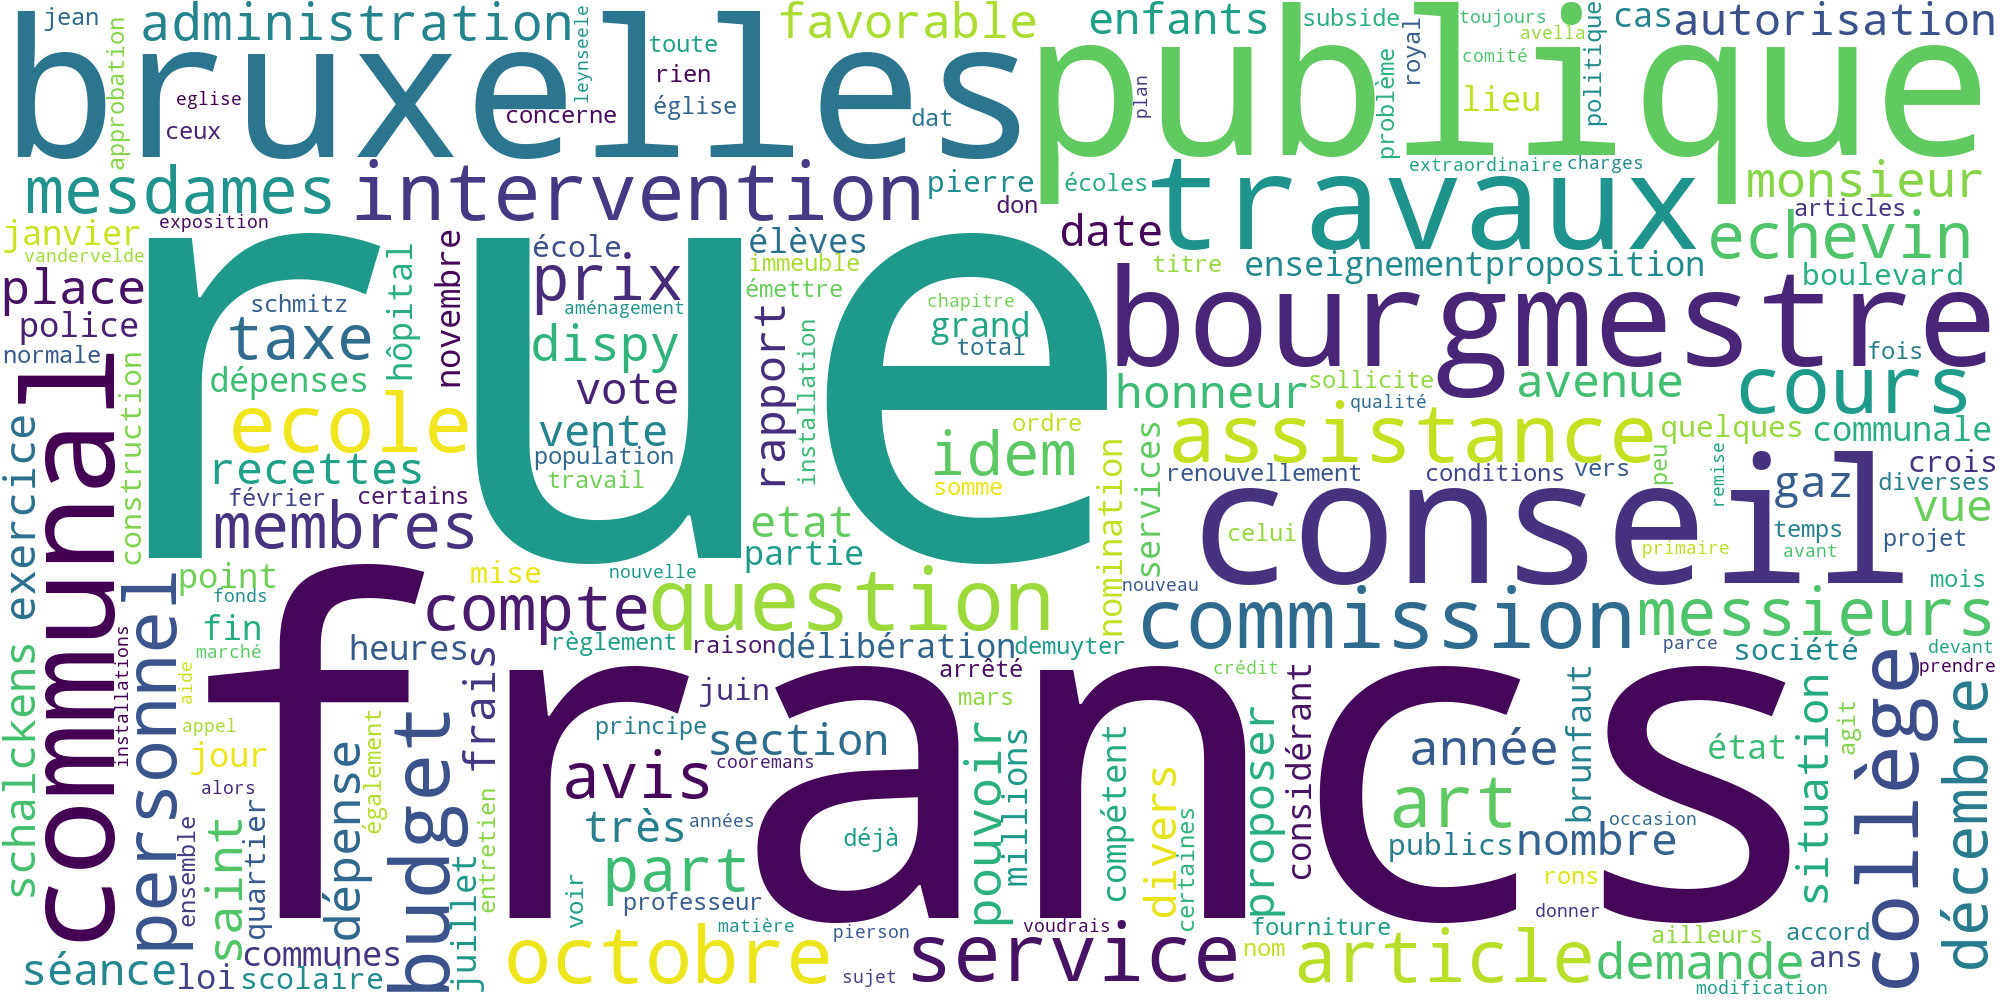

In [5]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)

# Choisir une année
year = 1954

# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))
    
# Nettoyer le fichier et écrire le résultat dans un autre fichier
clean_text(year, folder=temp_path)

with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

# Afficher les termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

# Créer, stocker et afficher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

On peut déjà remarquer que certains mots du nuage de mot n'apportent aucune information. Notons les mots "nombre", "ensemble", "temps", "ceux", "toujours", "celui", "très", "parce", "fois", "certaines","certain", "divers", "rien", "avant", "déjà", "certaine", "peu", "vers". Redéfinissons l'ensemble des stopwords pour prendre en compte ces mots inutiles et recommençons le traitement afin d'obtenir un nouveau nuage de mot. 

[('rue', 2205), ('francs', 1736), ('publique', 1634), ('bruxelles', 1605), ('conseil', 1303), ('bourgmestre', 1284), ('travaux', 1251), ('communal', 1143), ('question', 1079), ('collège', 1050)]


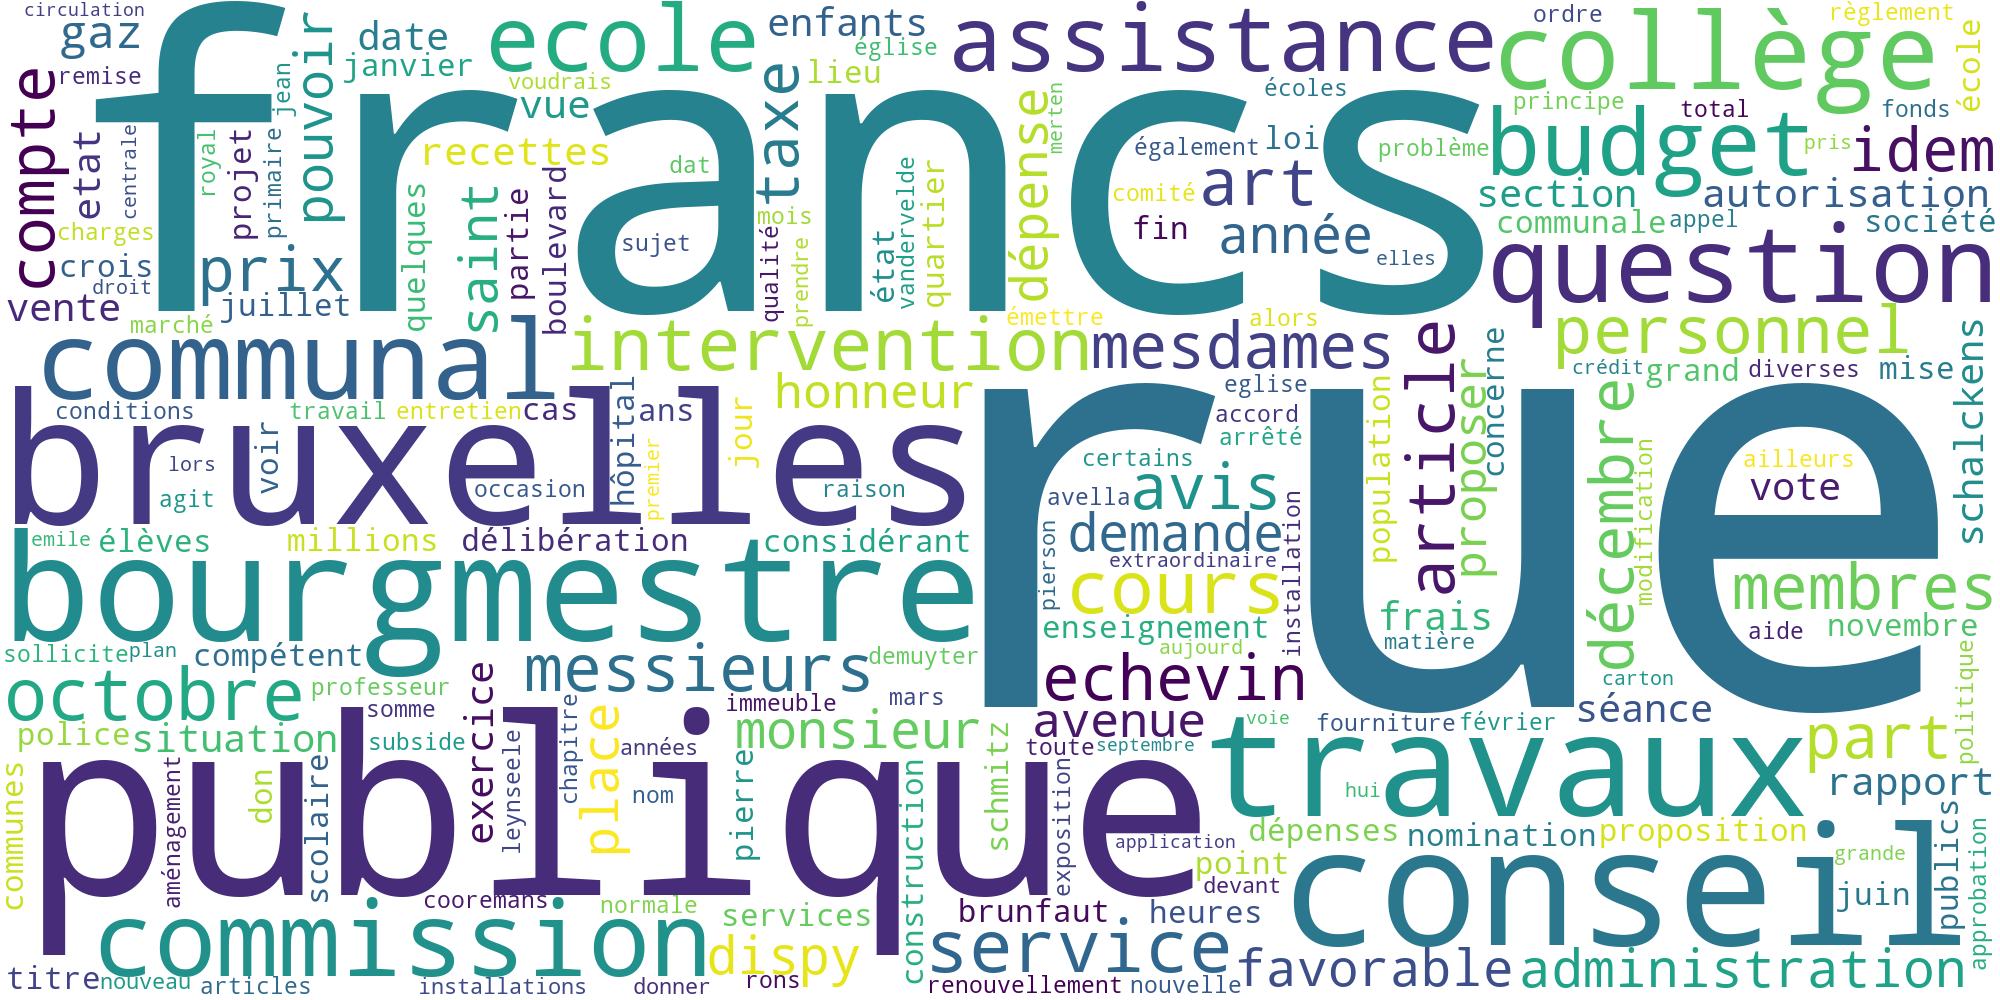

In [7]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville","nombre", "ensemble", "temps", "ceux", 
       "toujours", "celui", "très", "parce", "fois", "certaines","certain", "divers", 
       "rien", "avant", "déjà", "certaine", "peu", "vers"]
sw = set(sw)

# Nettoyer le fichier et écrire le résultat dans un autre fichier
clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

# Afficher les termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

# Créer, stocker et afficher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

En faisant l'expérience, on observe que de nouveaux mots inutiles apparaissent. Notons notamment l'apparition du mot "elles", "lors", "devant"... mis en avant par le filtre appliqué précedemment. En appliquant le même procédé itérativement, nous pouvons éliminer un certain nombre de mots du nuage de mots, ce qui permet de vraiment mettre en lumières les mots avec le plus de sémantique.

[('rue', 2205), ('francs', 1736), ('publique', 1634), ('bruxelles', 1605), ('conseil', 1303), ('bourgmestre', 1284), ('travaux', 1251), ('communal', 1143), ('question', 1079), ('collège', 1050)]


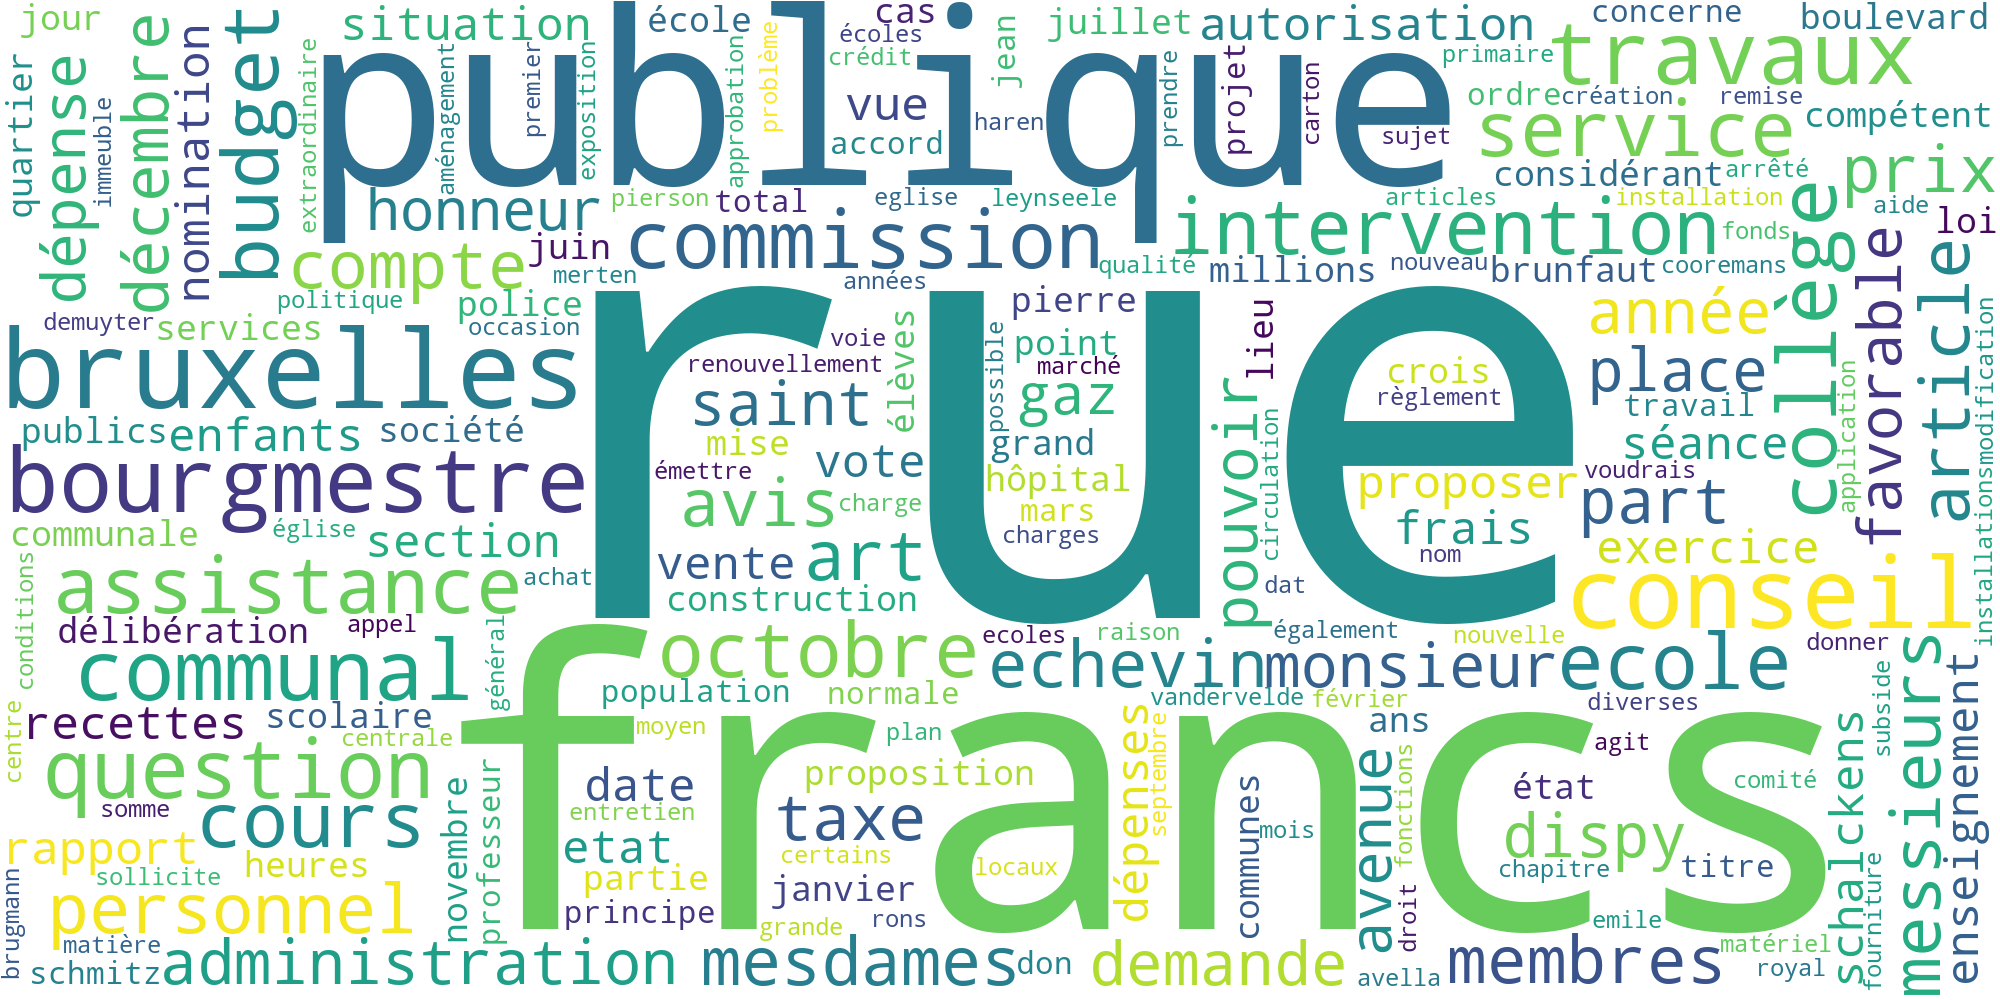

In [8]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville","nombre", "ensemble", "temps", "ceux", "toujours", 
       "celui", "très", "parce", "fois", "certaines","certain", "divers", "rien", "avant", "déjà", "certaine", 
       "peu","elles","lors","vers","devant","aujourd","hui","car","fin","pris","idem","voir","alors",
       "quelques","toute","chaque","etc","ailleurs"]
sw = set(sw)

# Nettoyer le fichier et écrire le résultat dans un autre fichier
clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

# Afficher les termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

# Créer, stocker et afficher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

A l'issue du processus, nous obtenons un nuage de mot beaucoup plus pertinent.

## Nuage de mot de l'ensemble du corpus
Puisque nous cherchons à mettre en lumière les termes spécifiques à l'année 1954, il est intéressant d'observer les mots très fréquents dans l'ensemble du corpus et de les retirer du nuage de mot observé afin de mettre en avant les mots restants.

[('rue', 199671), ('francs', 190769), ('conseil', 153317), ('collège', 125306), ('bruxelles', 118817), ('bourgmestre', 105885), ('travaux', 95804), ('art', 93775), ('service', 92348), ('communal', 88318)]


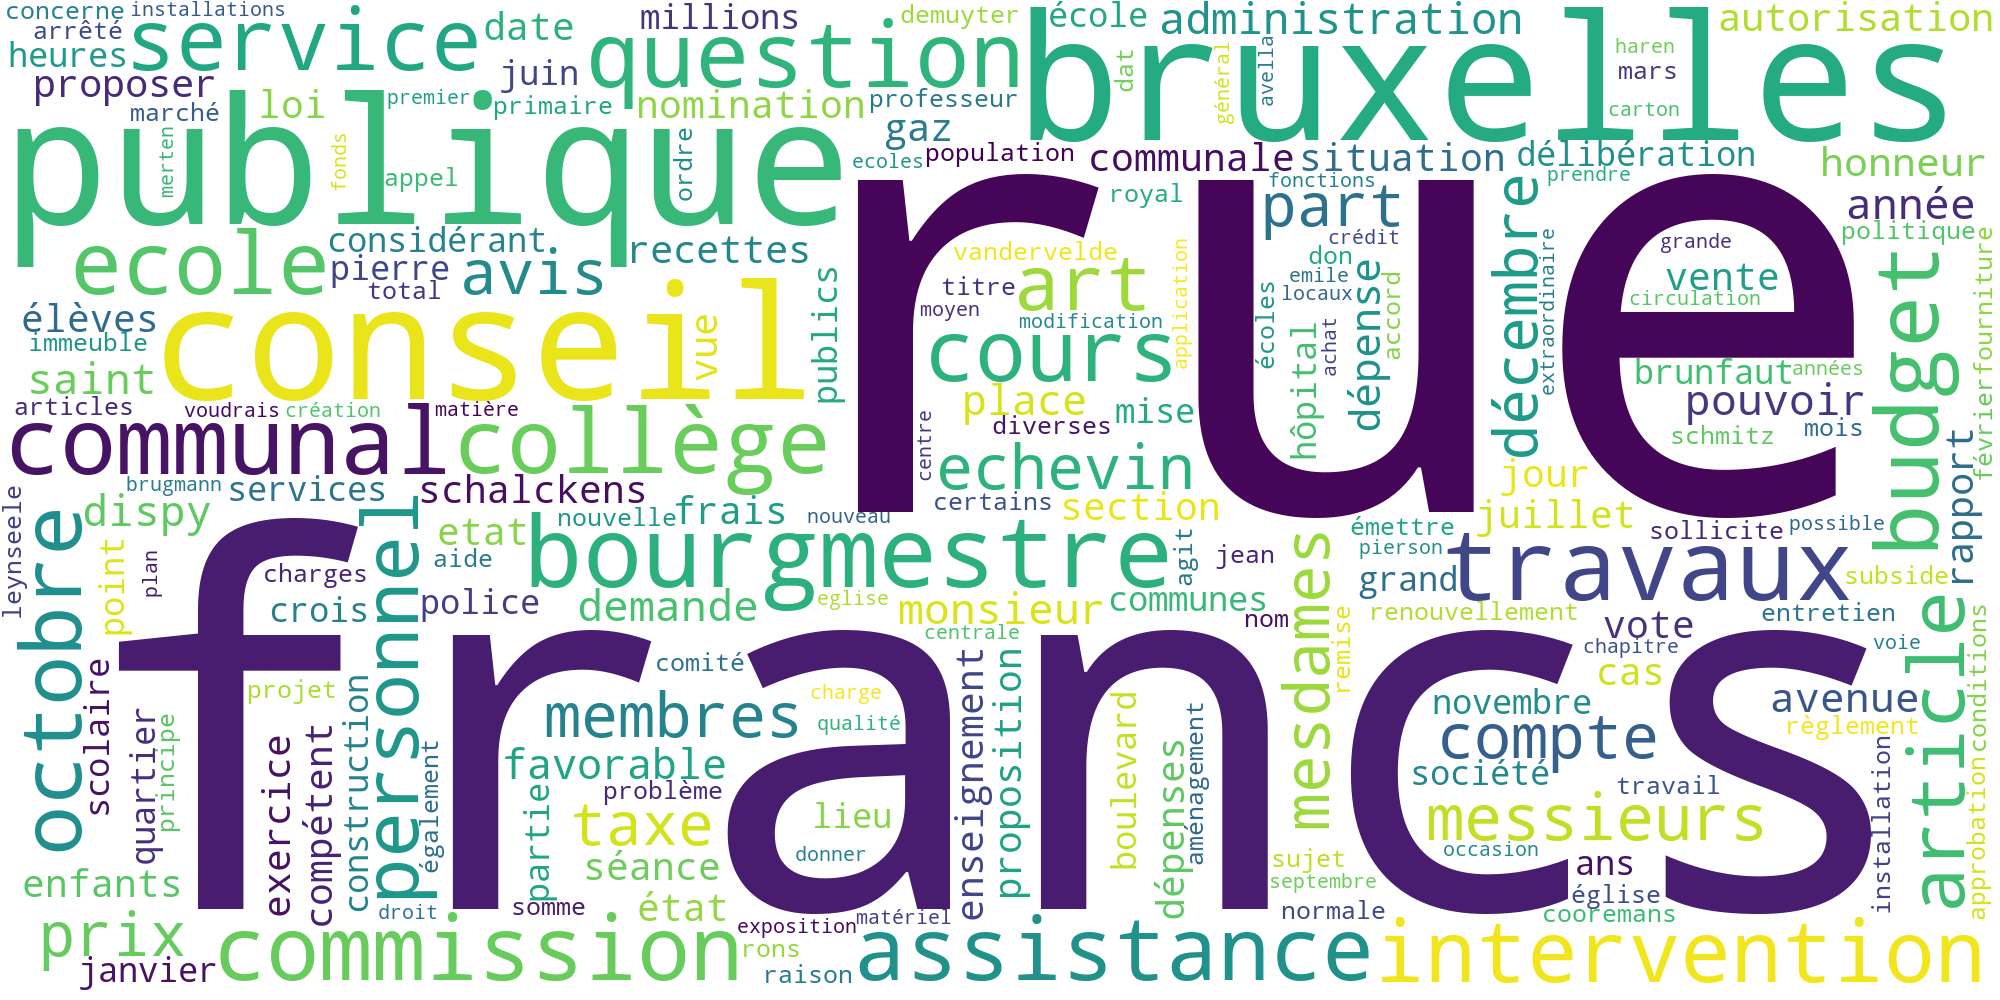

In [12]:
# Lister les fichiers
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f))]

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'all.txt'), 'w') as f:
    f.write(' '.join(content_list))

clean_text("all", folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, 'all_clean.txt'), 'r') as f:
    after_all = f.read()
    
frequencies_all = Counter(after_all.split())
print(frequencies_all.most_common(10))

cloud_all = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud_all.to_file(os.path.join(temp_path, "all.png"))
Image(filename=os.path.join(temp_path, "all.png"))

Il est intéressant de constater que globalement, les mots les plus fréquents se retrouvent dans les deux ensembles. C'est donc dans les mots un peu moins fréquents que nous allons retrouver les mots-clés spécifiques à l'année 1954.

Calculons la différence de fréquence pour chaque mot entre les bulletins de 1954 et ceux de l'ensemble du corpus.

In [14]:
diff_frequencies = Counter(frequencies)
diff_frequencies_all = Counter(frequencies_all)

for item, count in diff_frequencies.items():
    diff_frequencies[item] /= 29

for item, count in diff_frequencies_all.items():
    diff_frequencies_all[item] /= 2828

print("Fréquences pour un document 1954\n",diff_frequencies.most_common(10))
print("Fréquences pour un document corpus complet\n",diff_frequencies_all.most_common(10))
diff_frequencies.subtract(diff_frequencies_all)
print("Différences de fréquences\n",diff_frequencies.most_common(10))

Fréquences pour un document 1954
 [('rue', 76.03448275862068), ('francs', 59.86206896551724), ('publique', 56.3448275862069), ('bruxelles', 55.3448275862069), ('conseil', 44.93103448275862), ('bourgmestre', 44.275862068965516), ('travaux', 43.13793103448276), ('communal', 39.41379310344828), ('question', 37.206896551724135), ('collège', 36.206896551724135)]
Fréquences pour un document corpus complet
 [('rue', 70.60502121640735), ('francs', 67.45721357850071), ('conseil', 54.21393210749646), ('collège', 44.30905233380481), ('bruxelles', 42.014497878359265), ('bourgmestre', 37.441654879773694), ('travaux', 33.87694483734088), ('art', 33.159476661951906), ('service', 32.654879773691654), ('communal', 31.22984441301273)]
Différences de fréquences
 [('publique', 27.588109057211142), ('assistance', 21.807515973272203), ('intervention', 21.550382870799396), ('ecole', 20.630334585182652), ('commission', 18.91887772521094), ('octobre', 18.018777739842953), ('dispy', 16.308332926888745), ('mesda

Le Counter "diff_frequencies" contient donc les fréquences marginales des mots-clés dans les bulletins 1954. Regardons ce qu'on obtient en générant le nuage de mot sur base de ces différences de fréquences.

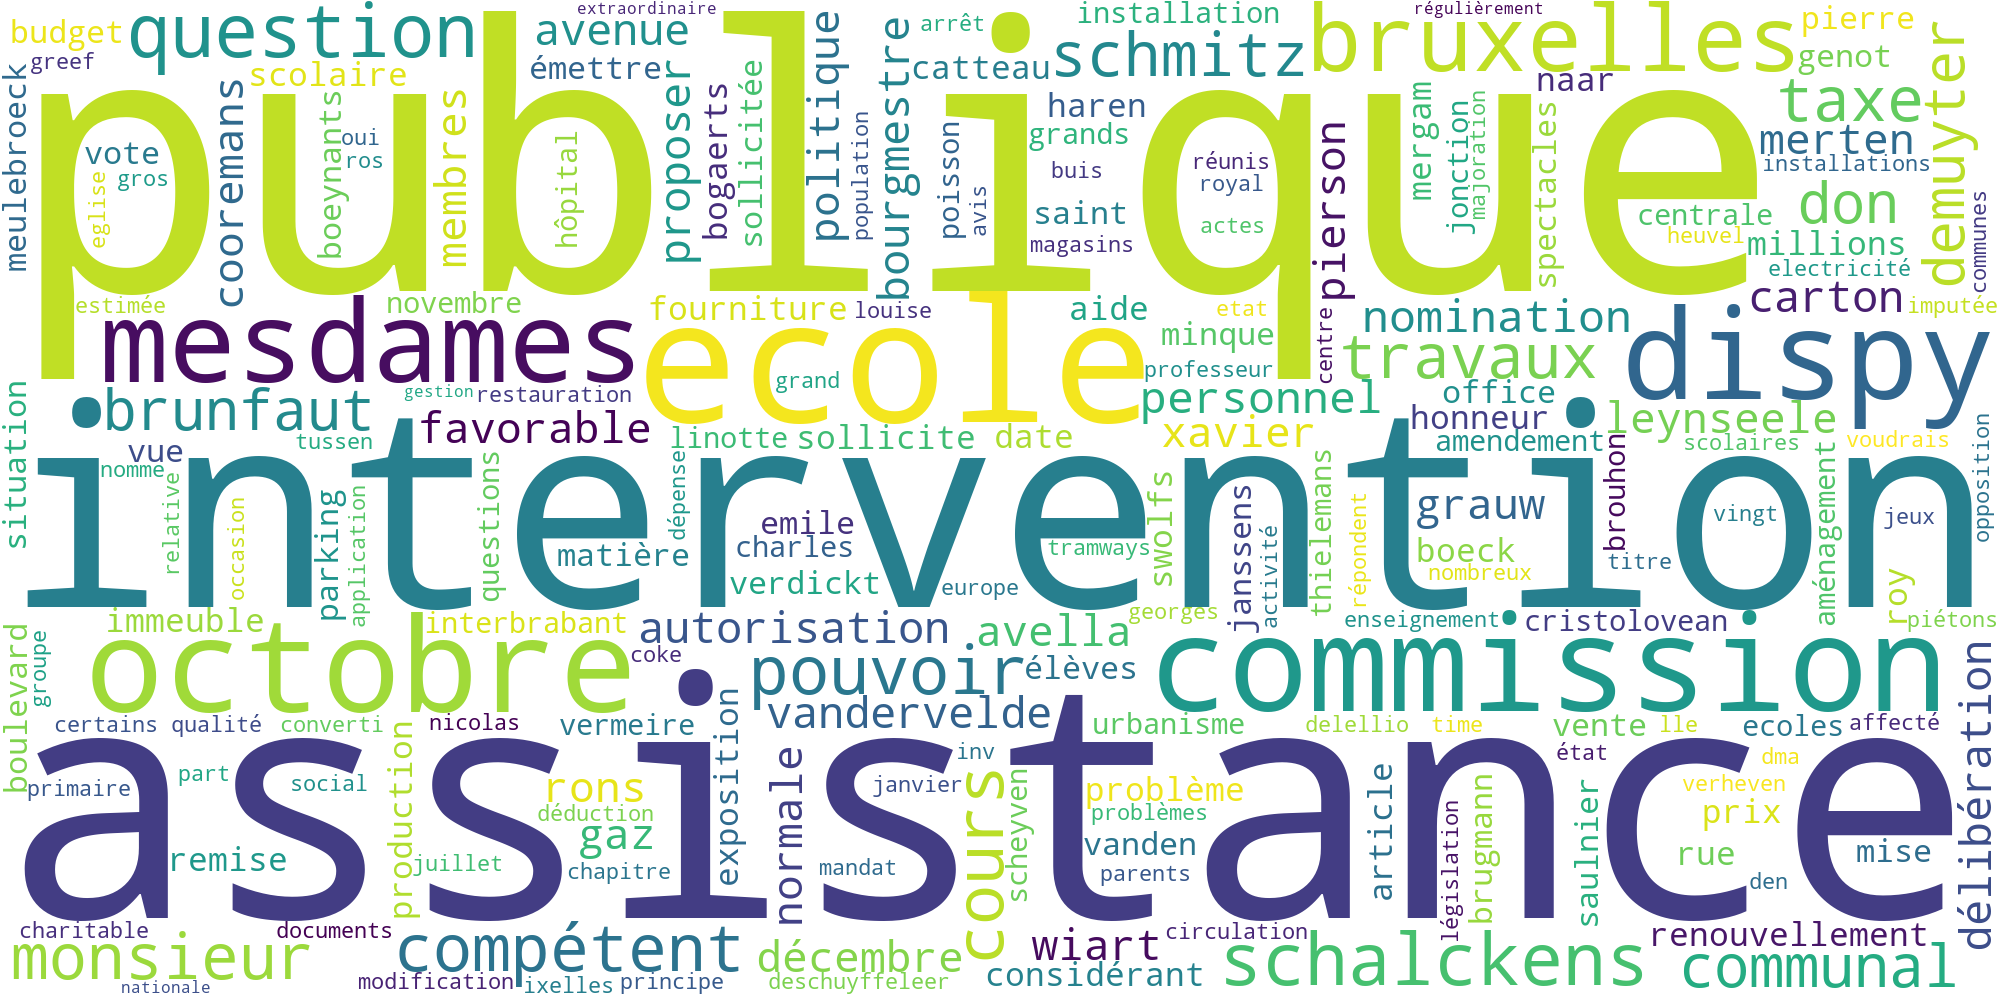

In [15]:
cloud_all = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(diff_frequencies)
cloud_all.to_file(os.path.join(temp_path, "diff_all.png"))
Image(filename=os.path.join(temp_path, "diff_all.png"))

# 3. Entités nommées

In [17]:
# Charger le texte
n=900000
text = open("../data/tmp/1954.txt", encoding='utf-8').read()[:n]

# Traiter le texte

doc = nlp(text)

# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
        
# Trier et imprimer

sorted_people_1954 = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people_1954[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Mesdames apparait 57 fois dans le corpus
Brunfaut apparait 39 fois dans le corpus
Echevin apparait 34 fois dans le corpus
Pierson apparait 30 fois dans le corpus
De Greef apparait 28 fois dans le corpus
De Saulnier apparait 27 fois dans le corpus
Xavier Carton de Wiart apparait 25 fois dans le corpus
De Boeck apparait 25 fois dans le corpus
Vermeire apparait 23 fois dans le corpus
Monsieur le Bourgmestre apparait 22 fois dans le corpus
Van de Meulebroeck apparait 21 fois dans le corpus
Charles Buis apparait 20 fois dans le corpus
Deschuyffeleer apparait 17 fois dans le corpus
Catteau apparait 16 fois dans le corpus
Janssens apparait 15 fois dans le corpus
q u e apparait 15 fois dans le corpus
é t é apparait 15 fois dans le corpus
q u ' i apparait 15 fois dans le corpus
Piron apparait 15 fois dans le corpus
Vanden Boeynants apparait 12 fois dans le corpus
M Van Leynseele apparait 12 fois dans le corpus
Emile Demot apparait 12 fois dans le corpus
Monsieur apparait 12 fois dans le corpus


Même traitement mais sur base du fichier nettoyé.

In [18]:
# Charger le texte
n=900000
text = open("../data/tmp/1954_clean.txt", encoding='utf-8').read()[:n]

# Traiter le texte

doc = nlp(text)

# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1
        
# Trier et imprimer

sorted_people_1954_clean = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people_1954_clean[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

mesdames messieurs apparait 169 fois dans le corpus
dispy apparait 56 fois dans le corpus
charles buis apparait 36 fois dans le corpus
pierson apparait 27 fois dans le corpus
brunfaut apparait 25 fois dans le corpus
cooremans den heuvel apparait 21 fois dans le corpus
emile demot apparait 19 fois dans le corpus
vandervelde apparait 19 fois dans le corpus
rogatchewsky apparait 19 fois dans le corpus
echevin apparait 18 fois dans le corpus
brunfaut catteau apparait 14 fois dans le corpus
lambert apparait 13 fois dans le corpus
deschuyffeleer leynseele schalckens verdickt meulebroeck apparait 12 fois dans le corpus
avella apparait 12 fois dans le corpus
verheven apparait 11 fois dans le corpus
grauw apparait 11 fois dans le corpus
adolphe max apparait 11 fois dans le corpus
joseph apparait 10 fois dans le corpus
saint nicolas apparait 10 fois dans le corpus
quote apparait 9 fois dans le corpus
echevin merten apparait 8 fois dans le corpus
brouhon apparait 8 fois dans le corpus
robert catt

# 4. Sentiment analysis

In [22]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [23]:
get_sentiment("Ils sont e x t r ê m e m e n t beaux.")

This text is 80% positive and 0.8% subjective.


In [24]:
get_sentiment("Aucune épidémie ne s'est montrée. ")

This text is neutral and perfectly objective.


In [34]:
get_sentiment("La banque nationale a fait don aux pauvres de cette ville, d'une somme de 2,000 francs, qui a été r é p a r t i e en bons de pain et de houille entre les divers comités de charité.")

This text is 11% positive and 0.24000000000000005% subjective.


In [26]:
get_sentiment("Eux seuls aussi présentent cette maladie si redoutable et toujours mortelle , la phlébite avec résorption purulente.")

This text is 45% negative and 0.5% subjective.


In [27]:
get_sentiment("Puis la société se trouve dans une position difficile en ce moment.")

This text is 50% negative and 0.4% subjective.


In [28]:
get_sentiment("O n déplorait depuis longtemps les inconvénients des lessives dans l'intérieur des maisons ou dans les mansardes des ouvriers, mais jamais personne n'avait trouvé le moyen d'y remédier ; les bains étaient considérés comme nécessaires à la propreté, mais l'ouvrier, l'artisan, ne pouvaient pas songer d'en prendre aux prix où ils sont fournis dans les établissements particuliers.")

This text is 2% negative and 0.1% subjective.


In [29]:
get_sentiment("Ce qui n'est pas moins évident, c'est que la tour gagnerait à être débarrassée de ce cadran malencontreux.")

This text is 10% positive and 0.1% subjective.


In [30]:
get_sentiment("Je vous ai vu pendant le choléra, pendant la terrible inondation q u i a m e n a c é Bruxelles, tel vous étiez alors, tel j'étais p e r s u a d é que vous seriez dans ces troubles.")

This text is 40% negative and 0.7% subjective.


In [31]:
get_sentiment("Nous avons été unanimes pour reconnaître que ce mode de clôture a son avantage.")

This text is neutral and perfectly objective.


In [32]:
get_sentiment("Le problème est d'autant plus difficile que nous ne voyons pas d'escaliers aux églises gothiques, et que, dans le cas actuel, l'intention évidente de l'architecte a été qu'il n'y en e û t point.")

This text is 15% negative and 0.24% subjective.


|                                                                                                                                                                                                                                                                                                                                                                                             | Polarité    | Subjectivité |   |   |
|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|--------------|---|---|
| Ils sont e x t r ê m e m e n t beaux.                                                                                                                                                                                                                                                                                                                                                       | 80% positif | 0.8%         |   |   |
| Aucune épidémie ne s'est montrée.                                                                                                                                                                                                                                                                                                                                                           | neutre      | objectif     |   |   |
| La banque nationale a fait don aux pauvres de cette ville, d'une somme de 2,000 francs, qui a été r é p a r t i e en bons de pain et de houille entre les divers comités de charité.                                                                                                                                                                                                        | 11% positif | 0.24%        |   |   |
| Eux seuls aussi présentent cette maladie si redoutable et toujours mortelle , la phlébite avec résorption purulente.                                                                                                                                                                                                                                                                        | 45% négatif | 0.5%         |   |   |
| Puis la société se trouve dans une position difficile en ce moment.                                                                                                                                                                                                                                                                                                                         | 50% négatif | 0.4%         |   |   |
| O n déplorait depuis longtemps les inconvénients des lessives dans l'intérieur des maisons ou dans les mansardes des ouvriers, mais jamais personne n'avait trouvé le moyen d'y remédier ; les bains étaient considérés comme nécessaires à la propreté, mais l'ouvrier, l'artisan, ne pouvaient pas songer d'en prendre aux prix où ils sont fournis dans les établissements particuliers. | 2% négatif  | 0.1%         |   |   |
| Ce qui n'est pas moins évident, c'est que la tour gagnerait à être débarrassée de ce cadran malencontreux.                                                                                                                                                                                                                                                                                  | 10% positif | 0.1%         |   |   |
| Je vous ai vu pendant le choléra, pendant la terrible inondation q u i a m e n a c é Bruxelles, tel vous étiez alors, tel j'étais p e r s u a d é que vous seriez dans ces troubles.                                                                                                                                                                                                        | 40% négatif | 0.7%         |   |   |
| Nous avons été unanimes pour reconnaître que ce mode de clôture a son avantage.                                                                                                                                                                                                                                                                                                             | neutre      | objectif     |   |   |
| Le problème est d'autant plus difficile que nous ne voyons pas d'escaliers aux églises gothiques, et que, dans le cas actuel, l'intention évidente de l'architecte a été qu'il n'y en e û t point.                                                                                                                                                                                          | 15% négatif | 0.24%        |   |   |